| Column Name       | Definition                                           |
|-------------------|-----------------------------------------------------|
| SYMBOL            | Stock symbol or code                                |
| OPEN              | Opening price of the stock                          |
| HIGH              | Highest price reached during the interval           |
| LOW               | Lowest price reached during the interval            |
| PREV. CLOSE       | Previous day's closing price                        |
| LTP               | Last traded price                                   |
| CHNG              | Change in price (LTP - PREV. CLOSE)                 |
| %CHNG             | Percentage change in price ((LTP - PREV. CLOSE) / PREV. CLOSE) * 100 |
| VOLUME (shares)   | Total volume of shares traded                       |
| VALUE             | Total value of shares traded                        |
| 52W H             | 52-week high price                                  |
| 52W L             | 52-week low price                                   |
| 30 D %CHNG        | Percentage change in the last 30 days              |
| 365 D % CHNG     | Percentage change in the last 365 days             |
| 30-Sep-2022       | Date of the data                                   |


In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Models
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor


In [83]:
df=pd.read_csv(r"C:\Users\prashant\Downloads\MW-NIFTY-TOTAL-MARKET-30-Sep-2023.csv")

In [84]:
df

,SYMBOL \n,OPEN \n,HIGH \n,LOW \n,PREV. CLOSE \n,LTP \n,CHNG \n,%CHNG \n,VOLUME \n(shares),VALUE,52W H \n,52W L \n,30 D %CHNG \n,365 D % CHNG \n 29-Sep-2022
0,NIFTY TOTAL MARKET,"9,666.80","9,737.90","9,653.75","9,633.95","9,702.50",68.55,0.71,"2,64,96,91,885","6,23,10,52,42,041.43","9,961.40","7,145.35",1.93,19.32
1,EDELWEISS,54.5,62.55,54.25,54.1,61.6,7.5,13.86,"4,55,07,201","2,68,17,39,354.93",77.4,35,9.77,4.08
2,GMDCLTD,284.35,323.85,284,282.95,315.8,32.85,11.61,"2,38,00,714","7,37,86,97,354.28",323.85,122.7,25.78,138.1
3,GLENMARK,783.75,861.7,782.1,776.95,854.8,77.85,10.02,"94,06,251","7,90,77,41,153.19",880,368,13.26,121.06
4,ASHOKA,112.8,123.3,111.8,112.15,123.1,10.95,9.76,"1,77,16,622","2,11,23,52,841.06",123.3,70.15,20.96,55.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747,TIINDIA,"3,040.00","3,100.30","2,905.00","3,103.80","2,985.00",-118.8,-3.83,"13,12,908","3,89,84,43,982.56","3,736.40","2,375.00",5.31,15.65
748,TATAINVEST,"3,437.95","3,475.00","3,245.55","3,440.60","3,280.00",-160.6,-4.67,"6,92,221","2,30,70,41,071.01","3,521.00","1,730.00",34.63,46.23
749,HNDFDS,573.85,574.05,531.55,568.4,537,-31.4,-5.52,"4,57,467","24,87,70,554.60",749,405,-2.12,18.09
750,FINCABLES,"1,200.00","1,216.25","1,110.50","1,195.55","1,116.00",-79.55,-6.65,"11,17,926","1,28,95,83,537.30","1,219.00",445.8,3.28,137.42


In [85]:
df.columns

Index(['SYMBOL \n', 'OPEN \n', 'HIGH \n', 'LOW \n', 'PREV. CLOSE \n', 'LTP \n',
       'CHNG \n', '%CHNG \n', 'VOLUME \n(shares)', 'VALUE ', '52W H \n',
       '52W L \n', '30 D   %CHNG \n', '365 D % CHNG \n 29-Sep-2022'],
      dtype='object')

In [86]:
column_mapping = {col: col.strip() for col in df.columns}

# Rename columns
df.rename(columns=column_mapping, inplace=True)

# Display the updated DataFrame
df

,SYMBOL,OPEN,HIGH,LOW,PREV. CLOSE,LTP,CHNG,%CHNG,VOLUME \n(shares),VALUE,52W H,52W L,30 D %CHNG,365 D % CHNG \n 29-Sep-2022
0,NIFTY TOTAL MARKET,"9,666.80","9,737.90","9,653.75","9,633.95","9,702.50",68.55,0.71,"2,64,96,91,885","6,23,10,52,42,041.43","9,961.40","7,145.35",1.93,19.32
1,EDELWEISS,54.5,62.55,54.25,54.1,61.6,7.5,13.86,"4,55,07,201","2,68,17,39,354.93",77.4,35,9.77,4.08
2,GMDCLTD,284.35,323.85,284,282.95,315.8,32.85,11.61,"2,38,00,714","7,37,86,97,354.28",323.85,122.7,25.78,138.1
3,GLENMARK,783.75,861.7,782.1,776.95,854.8,77.85,10.02,"94,06,251","7,90,77,41,153.19",880,368,13.26,121.06
4,ASHOKA,112.8,123.3,111.8,112.15,123.1,10.95,9.76,"1,77,16,622","2,11,23,52,841.06",123.3,70.15,20.96,55.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747,TIINDIA,"3,040.00","3,100.30","2,905.00","3,103.80","2,985.00",-118.8,-3.83,"13,12,908","3,89,84,43,982.56","3,736.40","2,375.00",5.31,15.65
748,TATAINVEST,"3,437.95","3,475.00","3,245.55","3,440.60","3,280.00",-160.6,-4.67,"6,92,221","2,30,70,41,071.01","3,521.00","1,730.00",34.63,46.23
749,HNDFDS,573.85,574.05,531.55,568.4,537,-31.4,-5.52,"4,57,467","24,87,70,554.60",749,405,-2.12,18.09
750,FINCABLES,"1,200.00","1,216.25","1,110.50","1,195.55","1,116.00",-79.55,-6.65,"11,17,926","1,28,95,83,537.30","1,219.00",445.8,3.28,137.42


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 752 entries, 0 to 751
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   SYMBOL                      752 non-null    object
 1   OPEN                        752 non-null    object
 2   HIGH                        752 non-null    object
 3   LOW                         752 non-null    object
 4   PREV. CLOSE                 752 non-null    object
 5   LTP                         752 non-null    object
 6   CHNG                        752 non-null    object
 7   %CHNG                       752 non-null    object
 8   VOLUME 
(shares)            752 non-null    object
 9   VALUE                       752 non-null    object
 10  52W H                       752 non-null    object
 11  52W L                       752 non-null    object
 12  30 D   %CHNG                752 non-null    object
 13  365 D % CHNG 
 29-Sep-2022  752 non-null    object

In [88]:
df.columns

Index(['SYMBOL', 'OPEN', 'HIGH', 'LOW', 'PREV. CLOSE', 'LTP', 'CHNG', '%CHNG',
       'VOLUME \n(shares)', 'VALUE', '52W H', '52W L', '30 D   %CHNG',
       '365 D % CHNG \n 29-Sep-2022'],
      dtype='object')

In [89]:
# Create a function to remove special characters and convert to numeric
def clean_and_convert(column):
    cleaned = column.str.replace(',', '', regex=True).str.replace('%', '', regex=True)
    return pd.to_numeric(cleaned, errors='coerce')

# List of columns to convert to numeric
columns_to_convert = ['OPEN', 'HIGH', 'LOW', 'PREV. CLOSE', 'LTP', 'CHNG', '%CHNG',
       'VOLUME \n(shares)', 'VALUE', '52W H', '52W L', '30 D   %CHNG',
       '365 D % CHNG \n 29-Sep-2022']

# Convert and clean selected columns
for col in columns_to_convert:
    df[col] = clean_and_convert(df[col])

# Display the updated DataFrame
print(df)

                 SYMBOL     OPEN     HIGH      LOW  PREV. CLOSE     LTP  \
0    NIFTY TOTAL MARKET  9666.80  9737.90  9653.75      9633.95  9702.5   
1             EDELWEISS    54.50    62.55    54.25        54.10    61.6   
2               GMDCLTD   284.35   323.85   284.00       282.95   315.8   
3              GLENMARK   783.75   861.70   782.10       776.95   854.8   
4                ASHOKA   112.80   123.30   111.80       112.15   123.1   
..                  ...      ...      ...      ...          ...     ...   
747             TIINDIA  3040.00  3100.30  2905.00      3103.80  2985.0   
748          TATAINVEST  3437.95  3475.00  3245.55      3440.60  3280.0   
749              HNDFDS   573.85   574.05   531.55       568.40   537.0   
750           FINCABLES  1200.00  1216.25  1110.50      1195.55  1116.0   
751          NAVINFLUOR  4000.00  4000.05  3726.65      4357.65  3764.0   

       CHNG  %CHNG  VOLUME \n(shares)         VALUE    52W H    52W L  \
0     68.55   0.71        

In [90]:
df

,SYMBOL,OPEN,HIGH,LOW,PREV. CLOSE,LTP,CHNG,%CHNG,VOLUME \n(shares),VALUE,52W H,52W L,30 D %CHNG,365 D % CHNG \n 29-Sep-2022
0,NIFTY TOTAL MARKET,9666.80,9737.90,9653.75,9633.95,9702.5,68.55,0.71,2649691885,6.231052e+11,9961.40,7145.35,1.93,19.32
1,EDELWEISS,54.50,62.55,54.25,54.10,61.6,7.50,13.86,45507201,2.681739e+09,77.40,35.00,9.77,4.08
2,GMDCLTD,284.35,323.85,284.00,282.95,315.8,32.85,11.61,23800714,7.378697e+09,323.85,122.70,25.78,138.10
3,GLENMARK,783.75,861.70,782.10,776.95,854.8,77.85,10.02,9406251,7.907741e+09,880.00,368.00,13.26,121.06
4,ASHOKA,112.80,123.30,111.80,112.15,123.1,10.95,9.76,17716622,2.112353e+09,123.30,70.15,20.96,55.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747,TIINDIA,3040.00,3100.30,2905.00,3103.80,2985.0,-118.80,-3.83,1312908,3.898444e+09,3736.40,2375.00,5.31,15.65
748,TATAINVEST,3437.95,3475.00,3245.55,3440.60,3280.0,-160.60,-4.67,692221,2.307041e+09,3521.00,1730.00,34.63,46.23
749,HNDFDS,573.85,574.05,531.55,568.40,537.0,-31.40,-5.52,457467,2.487706e+08,749.00,405.00,-2.12,18.09
750,FINCABLES,1200.00,1216.25,1110.50,1195.55,1116.0,-79.55,-6.65,1117926,1.289584e+09,1219.00,445.80,3.28,137.42


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 752 entries, 0 to 751
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   SYMBOL                      752 non-null    object 
 1   OPEN                        752 non-null    float64
 2   HIGH                        752 non-null    float64
 3   LOW                         752 non-null    float64
 4   PREV. CLOSE                 752 non-null    float64
 5   LTP                         752 non-null    float64
 6   CHNG                        747 non-null    float64
 7   %CHNG                       747 non-null    float64
 8   VOLUME 
(shares)            752 non-null    int64  
 9   VALUE                       752 non-null    float64
 10  52W H                       752 non-null    float64
 11  52W L                       752 non-null    float64
 12  30 D   %CHNG                747 non-null    float64
 13  365 D % CHNG 
 29-Sep-2022  707 non

In [92]:
df.isnull().sum()

SYMBOL                          0
OPEN                            0
HIGH                            0
LOW                             0
PREV. CLOSE                     0
LTP                             0
CHNG                            5
%CHNG                           5
VOLUME \n(shares)               0
VALUE                           0
52W H                           0
52W L                           0
30 D   %CHNG                    5
365 D % CHNG \n 29-Sep-2022    45
dtype: int64

In [93]:
df.fillna(0,inplace=True)

In [94]:
df.isnull().sum()

SYMBOL                         0
OPEN                           0
HIGH                           0
LOW                            0
PREV. CLOSE                    0
LTP                            0
CHNG                           0
%CHNG                          0
VOLUME \n(shares)              0
VALUE                          0
52W H                          0
52W L                          0
30 D   %CHNG                   0
365 D % CHNG \n 29-Sep-2022    0
dtype: int64

In [95]:
df.head()

,SYMBOL,OPEN,HIGH,LOW,PREV. CLOSE,LTP,CHNG,%CHNG,VOLUME \n(shares),VALUE,52W H,52W L,30 D %CHNG,365 D % CHNG \n 29-Sep-2022
0,NIFTY TOTAL MARKET,9666.80,9737.90,9653.75,9633.95,9702.5,68.55,0.71,2649691885,6.231052e+11,9961.40,7145.35,1.93,19.32
1,EDELWEISS,54.50,62.55,54.25,54.10,61.6,7.50,13.86,45507201,2.681739e+09,77.40,35.00,9.77,4.08
2,GMDCLTD,284.35,323.85,284.00,282.95,315.8,32.85,11.61,23800714,7.378697e+09,323.85,122.70,25.78,138.10
3,GLENMARK,783.75,861.70,782.10,776.95,854.8,77.85,10.02,9406251,7.907741e+09,880.00,368.00,13.26,121.06
4,ASHOKA,112.80,123.30,111.80,112.15,123.1,10.95,9.76,17716622,2.112353e+09,123.30,70.15,20.96,55.86


In [96]:
df['Daily Return'] = (df['LTP'] - df['PREV. CLOSE']) / df['PREV. CLOSE']

# Calculate volatility (assuming a 30-day period)
window = 30  # You can change this window size as needed
df['Volatility'] = df['Daily Return'].rolling(window=window).std() * (365 ** 0.5)


In [97]:
df.head()

,SYMBOL,OPEN,HIGH,LOW,PREV. CLOSE,LTP,CHNG,%CHNG,VOLUME \n(shares),VALUE,52W H,52W L,30 D %CHNG,365 D % CHNG \n 29-Sep-2022,Daily Return,Volatility
0,NIFTY TOTAL MARKET,9666.80,9737.90,9653.75,9633.95,9702.5,68.55,0.71,2649691885,6.231052e+11,9961.40,7145.35,1.93,19.32,0.007115,NaN
1,EDELWEISS,54.50,62.55,54.25,54.10,61.6,7.50,13.86,45507201,2.681739e+09,77.40,35.00,9.77,4.08,0.138632,NaN
2,GMDCLTD,284.35,323.85,284.00,282.95,315.8,32.85,11.61,23800714,7.378697e+09,323.85,122.70,25.78,138.10,0.116098,NaN
3,GLENMARK,783.75,861.70,782.10,776.95,854.8,77.85,10.02,9406251,7.907741e+09,880.00,368.00,13.26,121.06,0.100199,NaN
4,ASHOKA,112.80,123.30,111.80,112.15,123.1,10.95,9.76,17716622,2.112353e+09,123.30,70.15,20.96,55.86,0.097637,NaN


In [98]:
df.isnull().sum()

SYMBOL                          0
OPEN                            0
HIGH                            0
LOW                             0
PREV. CLOSE                     0
LTP                             0
CHNG                            0
%CHNG                           0
VOLUME \n(shares)               0
VALUE                           0
52W H                           0
52W L                           0
30 D   %CHNG                    0
365 D % CHNG \n 29-Sep-2022     0
Daily Return                    0
Volatility                     29
dtype: int64

In [99]:
df.fillna(0,inplace=True)
df

,SYMBOL,OPEN,HIGH,LOW,PREV. CLOSE,LTP,CHNG,%CHNG,VOLUME \n(shares),VALUE,52W H,52W L,30 D %CHNG,365 D % CHNG \n 29-Sep-2022,Daily Return,Volatility
0,NIFTY TOTAL MARKET,9666.80,9737.90,9653.75,9633.95,9702.5,68.55,0.71,2649691885,6.231052e+11,9961.40,7145.35,1.93,19.32,0.007115,0.000000
1,EDELWEISS,54.50,62.55,54.25,54.10,61.6,7.50,13.86,45507201,2.681739e+09,77.40,35.00,9.77,4.08,0.138632,0.000000
2,GMDCLTD,284.35,323.85,284.00,282.95,315.8,32.85,11.61,23800714,7.378697e+09,323.85,122.70,25.78,138.10,0.116098,0.000000
3,GLENMARK,783.75,861.70,782.10,776.95,854.8,77.85,10.02,9406251,7.907741e+09,880.00,368.00,13.26,121.06,0.100199,0.000000
4,ASHOKA,112.80,123.30,111.80,112.15,123.1,10.95,9.76,17716622,2.112353e+09,123.30,70.15,20.96,55.86,0.097637,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747,TIINDIA,3040.00,3100.30,2905.00,3103.80,2985.0,-118.80,-3.83,1312908,3.898444e+09,3736.40,2375.00,5.31,15.65,-0.038276,0.102743
748,TATAINVEST,3437.95,3475.00,3245.55,3440.60,3280.0,-160.60,-4.67,692221,2.307041e+09,3521.00,1730.00,34.63,46.23,-0.046678,0.127416
749,HNDFDS,573.85,574.05,531.55,568.40,537.0,-31.40,-5.52,457467,2.487706e+08,749.00,405.00,-2.12,18.09,-0.055243,0.163238
750,FINCABLES,1200.00,1216.25,1110.50,1195.55,1116.0,-79.55,-6.65,1117926,1.289584e+09,1219.00,445.80,3.28,137.42,-0.066538,0.213084


In [100]:
df['7-Day MA'] = df['LTP'].rolling(window=7).mean()
df['30-Day MA'] = df['LTP'].rolling(window=30).mean()
df['50-Day MA'] = df['LTP'].rolling(window=50).mean()
df['200-Day MA'] = df['LTP'].rolling(window=200).mean()

In [101]:
df

,SYMBOL,OPEN,HIGH,LOW,PREV. CLOSE,LTP,CHNG,%CHNG,VOLUME \n(shares),VALUE,52W H,52W L,30 D %CHNG,365 D % CHNG \n 29-Sep-2022,Daily Return,Volatility,7-Day MA,30-Day MA,50-Day MA,200-Day MA
0,NIFTY TOTAL MARKET,9666.80,9737.90,9653.75,9633.95,9702.5,68.55,0.71,2649691885,6.231052e+11,9961.40,7145.35,1.93,19.32,0.007115,0.000000,NaN,NaN,NaN,NaN
1,EDELWEISS,54.50,62.55,54.25,54.10,61.6,7.50,13.86,45507201,2.681739e+09,77.40,35.00,9.77,4.08,0.138632,0.000000,NaN,NaN,NaN,NaN
2,GMDCLTD,284.35,323.85,284.00,282.95,315.8,32.85,11.61,23800714,7.378697e+09,323.85,122.70,25.78,138.10,0.116098,0.000000,NaN,NaN,NaN,NaN
3,GLENMARK,783.75,861.70,782.10,776.95,854.8,77.85,10.02,9406251,7.907741e+09,880.00,368.00,13.26,121.06,0.100199,0.000000,NaN,NaN,NaN,NaN
4,ASHOKA,112.80,123.30,111.80,112.15,123.1,10.95,9.76,17716622,2.112353e+09,123.30,70.15,20.96,55.86,0.097637,0.000000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747,TIINDIA,3040.00,3100.30,2905.00,3103.80,2985.0,-118.80,-3.83,1312908,3.898444e+09,3736.40,2375.00,5.31,15.65,-0.038276,0.102743,890.042857,1366.771667,1478.040,1980.48650
748,TATAINVEST,3437.95,3475.00,3245.55,3440.60,3280.0,-160.60,-4.67,692221,2.307041e+09,3521.00,1730.00,34.63,46.23,-0.046678,0.127416,1326.714286,1452.638333,1525.489,1984.97675
749,HNDFDS,573.85,574.05,531.55,568.40,537.0,-31.40,-5.52,457467,2.487706e+08,749.00,405.00,-2.12,18.09,-0.055243,0.163238,1328.064286,1444.571667,1526.159,1973.34650
750,FINCABLES,1200.00,1216.25,1110.50,1195.55,1116.0,-79.55,-6.65,1117926,1.289584e+09,1219.00,445.80,3.28,137.42,-0.066538,0.213084,1336.721429,1287.271667,1542.129,1972.30250


In [102]:
def calculate_rsi(data, period=14):
    delta = data['LTP'].diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=period).mean()
    avg_loss = loss.rolling(window=period).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

df['RSI'] = calculate_rsi(df)


In [103]:
df

,SYMBOL,OPEN,HIGH,LOW,PREV. CLOSE,LTP,CHNG,%CHNG,VOLUME \n(shares),VALUE,...,52W L,30 D %CHNG,365 D % CHNG \n 29-Sep-2022,Daily Return,Volatility,7-Day MA,30-Day MA,50-Day MA,200-Day MA,RSI
0,NIFTY TOTAL MARKET,9666.80,9737.90,9653.75,9633.95,9702.5,68.55,0.71,2649691885,6.231052e+11,...,7145.35,1.93,19.32,0.007115,0.000000,NaN,NaN,NaN,NaN,NaN
1,EDELWEISS,54.50,62.55,54.25,54.10,61.6,7.50,13.86,45507201,2.681739e+09,...,35.00,9.77,4.08,0.138632,0.000000,NaN,NaN,NaN,NaN,NaN
2,GMDCLTD,284.35,323.85,284.00,282.95,315.8,32.85,11.61,23800714,7.378697e+09,...,122.70,25.78,138.10,0.116098,0.000000,NaN,NaN,NaN,NaN,NaN
3,GLENMARK,783.75,861.70,782.10,776.95,854.8,77.85,10.02,9406251,7.907741e+09,...,368.00,13.26,121.06,0.100199,0.000000,NaN,NaN,NaN,NaN,NaN
4,ASHOKA,112.80,123.30,111.80,112.15,123.1,10.95,9.76,17716622,2.112353e+09,...,70.15,20.96,55.86,0.097637,0.000000,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747,TIINDIA,3040.00,3100.30,2905.00,3103.80,2985.0,-118.80,-3.83,1312908,3.898444e+09,...,2375.00,5.31,15.65,-0.038276,0.102743,890.042857,1366.771667,1478.040,1980.48650,57.494902
748,TATAINVEST,3437.95,3475.00,3245.55,3440.60,3280.0,-160.60,-4.67,692221,2.307041e+09,...,1730.00,34.63,46.23,-0.046678,0.127416,1326.714286,1452.638333,1525.489,1984.97675,58.385272
749,HNDFDS,573.85,574.05,531.55,568.40,537.0,-31.40,-5.52,457467,2.487706e+08,...,405.00,-2.12,18.09,-0.055243,0.163238,1328.064286,1444.571667,1526.159,1973.34650,50.373904
750,FINCABLES,1200.00,1216.25,1110.50,1195.55,1116.0,-79.55,-6.65,1117926,1.289584e+09,...,445.80,3.28,137.42,-0.066538,0.213084,1336.721429,1287.271667,1542.129,1972.30250,52.329102


In [104]:
df['Bid-Ask Spread'] = (df['HIGH'] - df['LOW']) / df['LTP']
df['Volume Ratio'] = df['VOLUME \n(shares)'] / df['VALUE']

In [105]:
df

,SYMBOL,OPEN,HIGH,LOW,PREV. CLOSE,LTP,CHNG,%CHNG,VOLUME \n(shares),VALUE,...,365 D % CHNG \n 29-Sep-2022,Daily Return,Volatility,7-Day MA,30-Day MA,50-Day MA,200-Day MA,RSI,Bid-Ask Spread,Volume Ratio
0,NIFTY TOTAL MARKET,9666.80,9737.90,9653.75,9633.95,9702.5,68.55,0.71,2649691885,6.231052e+11,...,19.32,0.007115,0.000000,NaN,NaN,NaN,NaN,NaN,0.008673,0.004252
1,EDELWEISS,54.50,62.55,54.25,54.10,61.6,7.50,13.86,45507201,2.681739e+09,...,4.08,0.138632,0.000000,NaN,NaN,NaN,NaN,NaN,0.134740,0.016969
2,GMDCLTD,284.35,323.85,284.00,282.95,315.8,32.85,11.61,23800714,7.378697e+09,...,138.10,0.116098,0.000000,NaN,NaN,NaN,NaN,NaN,0.126187,0.003226
3,GLENMARK,783.75,861.70,782.10,776.95,854.8,77.85,10.02,9406251,7.907741e+09,...,121.06,0.100199,0.000000,NaN,NaN,NaN,NaN,NaN,0.093121,0.001189
4,ASHOKA,112.80,123.30,111.80,112.15,123.1,10.95,9.76,17716622,2.112353e+09,...,55.86,0.097637,0.000000,NaN,NaN,NaN,NaN,NaN,0.093420,0.008387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747,TIINDIA,3040.00,3100.30,2905.00,3103.80,2985.0,-118.80,-3.83,1312908,3.898444e+09,...,15.65,-0.038276,0.102743,890.042857,1366.771667,1478.040,1980.48650,57.494902,0.065427,0.000337
748,TATAINVEST,3437.95,3475.00,3245.55,3440.60,3280.0,-160.60,-4.67,692221,2.307041e+09,...,46.23,-0.046678,0.127416,1326.714286,1452.638333,1525.489,1984.97675,58.385272,0.069954,0.000300
749,HNDFDS,573.85,574.05,531.55,568.40,537.0,-31.40,-5.52,457467,2.487706e+08,...,18.09,-0.055243,0.163238,1328.064286,1444.571667,1526.159,1973.34650,50.373904,0.079143,0.001839
750,FINCABLES,1200.00,1216.25,1110.50,1195.55,1116.0,-79.55,-6.65,1117926,1.289584e+09,...,137.42,-0.066538,0.213084,1336.721429,1287.271667,1542.129,1972.30250,52.329102,0.094758,0.000867


In [106]:
df.fillna(0,inplace=True)
df

,SYMBOL,OPEN,HIGH,LOW,PREV. CLOSE,LTP,CHNG,%CHNG,VOLUME \n(shares),VALUE,...,365 D % CHNG \n 29-Sep-2022,Daily Return,Volatility,7-Day MA,30-Day MA,50-Day MA,200-Day MA,RSI,Bid-Ask Spread,Volume Ratio
0,NIFTY TOTAL MARKET,9666.80,9737.90,9653.75,9633.95,9702.5,68.55,0.71,2649691885,6.231052e+11,...,19.32,0.007115,0.000000,0.000000,0.000000,0.000,0.00000,0.000000,0.008673,0.004252
1,EDELWEISS,54.50,62.55,54.25,54.10,61.6,7.50,13.86,45507201,2.681739e+09,...,4.08,0.138632,0.000000,0.000000,0.000000,0.000,0.00000,0.000000,0.134740,0.016969
2,GMDCLTD,284.35,323.85,284.00,282.95,315.8,32.85,11.61,23800714,7.378697e+09,...,138.10,0.116098,0.000000,0.000000,0.000000,0.000,0.00000,0.000000,0.126187,0.003226
3,GLENMARK,783.75,861.70,782.10,776.95,854.8,77.85,10.02,9406251,7.907741e+09,...,121.06,0.100199,0.000000,0.000000,0.000000,0.000,0.00000,0.000000,0.093121,0.001189
4,ASHOKA,112.80,123.30,111.80,112.15,123.1,10.95,9.76,17716622,2.112353e+09,...,55.86,0.097637,0.000000,0.000000,0.000000,0.000,0.00000,0.000000,0.093420,0.008387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747,TIINDIA,3040.00,3100.30,2905.00,3103.80,2985.0,-118.80,-3.83,1312908,3.898444e+09,...,15.65,-0.038276,0.102743,890.042857,1366.771667,1478.040,1980.48650,57.494902,0.065427,0.000337
748,TATAINVEST,3437.95,3475.00,3245.55,3440.60,3280.0,-160.60,-4.67,692221,2.307041e+09,...,46.23,-0.046678,0.127416,1326.714286,1452.638333,1525.489,1984.97675,58.385272,0.069954,0.000300
749,HNDFDS,573.85,574.05,531.55,568.40,537.0,-31.40,-5.52,457467,2.487706e+08,...,18.09,-0.055243,0.163238,1328.064286,1444.571667,1526.159,1973.34650,50.373904,0.079143,0.001839
750,FINCABLES,1200.00,1216.25,1110.50,1195.55,1116.0,-79.55,-6.65,1117926,1.289584e+09,...,137.42,-0.066538,0.213084,1336.721429,1287.271667,1542.129,1972.30250,52.329102,0.094758,0.000867


In [107]:
df.columns

Index(['SYMBOL', 'OPEN', 'HIGH', 'LOW', 'PREV. CLOSE', 'LTP', 'CHNG', '%CHNG',
       'VOLUME \n(shares)', 'VALUE', '52W H', '52W L', '30 D   %CHNG',
       '365 D % CHNG \n 29-Sep-2022', 'Daily Return', 'Volatility', '7-Day MA',
       '30-Day MA', '50-Day MA', '200-Day MA', 'RSI', 'Bid-Ask Spread',
       'Volume Ratio'],
      dtype='object')

In [108]:
# Define a function to categorize risk based on user risk level
def categorize_risk(volatility):
    if volatility <= 0.20:
        return 'Low Risk'
    elif 0.20 < volatility <= 0.30:
        return 'Medium Risk'
    elif 0.30 < volatility :
        return 'High Risk'
    else:
        return 'Invalid'

# Apply the risk assessment function to each row in the DataFrame
df['Risk Category'] = df['Volatility'].apply(categorize_risk)


In [109]:
df

,SYMBOL,OPEN,HIGH,LOW,PREV. CLOSE,LTP,CHNG,%CHNG,VOLUME \n(shares),VALUE,...,Daily Return,Volatility,7-Day MA,30-Day MA,50-Day MA,200-Day MA,RSI,Bid-Ask Spread,Volume Ratio,Risk Category
0,NIFTY TOTAL MARKET,9666.80,9737.90,9653.75,9633.95,9702.5,68.55,0.71,2649691885,6.231052e+11,...,0.007115,0.000000,0.000000,0.000000,0.000,0.00000,0.000000,0.008673,0.004252,Low Risk
1,EDELWEISS,54.50,62.55,54.25,54.10,61.6,7.50,13.86,45507201,2.681739e+09,...,0.138632,0.000000,0.000000,0.000000,0.000,0.00000,0.000000,0.134740,0.016969,Low Risk
2,GMDCLTD,284.35,323.85,284.00,282.95,315.8,32.85,11.61,23800714,7.378697e+09,...,0.116098,0.000000,0.000000,0.000000,0.000,0.00000,0.000000,0.126187,0.003226,Low Risk
3,GLENMARK,783.75,861.70,782.10,776.95,854.8,77.85,10.02,9406251,7.907741e+09,...,0.100199,0.000000,0.000000,0.000000,0.000,0.00000,0.000000,0.093121,0.001189,Low Risk
4,ASHOKA,112.80,123.30,111.80,112.15,123.1,10.95,9.76,17716622,2.112353e+09,...,0.097637,0.000000,0.000000,0.000000,0.000,0.00000,0.000000,0.093420,0.008387,Low Risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747,TIINDIA,3040.00,3100.30,2905.00,3103.80,2985.0,-118.80,-3.83,1312908,3.898444e+09,...,-0.038276,0.102743,890.042857,1366.771667,1478.040,1980.48650,57.494902,0.065427,0.000337,Low Risk
748,TATAINVEST,3437.95,3475.00,3245.55,3440.60,3280.0,-160.60,-4.67,692221,2.307041e+09,...,-0.046678,0.127416,1326.714286,1452.638333,1525.489,1984.97675,58.385272,0.069954,0.000300,Low Risk
749,HNDFDS,573.85,574.05,531.55,568.40,537.0,-31.40,-5.52,457467,2.487706e+08,...,-0.055243,0.163238,1328.064286,1444.571667,1526.159,1973.34650,50.373904,0.079143,0.001839,Low Risk
750,FINCABLES,1200.00,1216.25,1110.50,1195.55,1116.0,-79.55,-6.65,1117926,1.289584e+09,...,-0.066538,0.213084,1336.721429,1287.271667,1542.129,1972.30250,52.329102,0.094758,0.000867,Medium Risk


In [110]:
df['Risk Category'].value_counts()

Risk Category
Low Risk       743
High Risk        5
Medium Risk      4
Name: count, dtype: int64

In [111]:
columns_to_drop = ['VOLUME \n(shares)', 'VALUE', 'SYMBOL', 'Risk Category']

# Drop the specified columns
df.drop(columns=columns_to_drop, inplace=True)




In [112]:
df.columns

Index(['OPEN', 'HIGH', 'LOW', 'PREV. CLOSE', 'LTP', 'CHNG', '%CHNG', '52W H',
       '52W L', '30 D   %CHNG', '365 D % CHNG \n 29-Sep-2022', 'Daily Return',
       'Volatility', '7-Day MA', '30-Day MA', '50-Day MA', '200-Day MA', 'RSI',
       'Bid-Ask Spread', 'Volume Ratio'],
      dtype='object')

In [113]:
from math import sqrt

In [114]:
X=df[['OPEN', 'HIGH', 'LOW', 'PREV. CLOSE', 'LTP', 'CHNG', '%CHNG', '52W H',
       '52W L', '30 D   %CHNG', '365 D % CHNG \n 29-Sep-2022', 'Daily Return',
       'Volatility', '7-Day MA', '30-Day MA', '50-Day MA', '200-Day MA', 'RSI',
       'Bid-Ask Spread', 'Volume Ratio']]
y=df['LTP']

In [115]:
#  separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((601, 20), (151, 20))

In [116]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    # mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true,predicted))
    r2_square = r2_score(true,predicted)
    return mae, rmse, r2_square

In [117]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Support Vector Regressor": SVR(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evalute Train and test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train,y_train_pred)
    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*45)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000


Lasso
Model performance for Training set
- Root Mean Squared Error: 18.4251
- Mean Absolute Error: 7.5227
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 25.9087
- Mean Absolute Error: 7.4124
- R2 Score: 1.0000


Ridge
Model performance for Training set
- Root Mean Squared Error: 0.0001
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.0005
- Mean Absolute Error: 0.0001
- R2 Score: 1.0000


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 2669.6340
- Mean Absolute Error: 203.4260
- R2 Score: 0.7396
----------------

Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 1499.6625
- Mean Absolute Error: 84.1799
- R2 Score: 0.9178
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 900.3900
- Mean Absolute Error: 117.8502
- R2 Score: 0.9524


XGBRegressor
Model performance for Training set
- Root Mean Squared Error: 0.7226
- Mean Absolute Error: 0.5097
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 559.4445
- Mean Absolute Error: 74.3242
- R2 Score: 0.9816


CatBoosting Regressor
Model performance for Training set
- Root Mean Squared Error: 23.1592
- Mean Absolute Error: 18.3078
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 850.7504
- Mean Absolute Error: 161.9573
- R2 Score: 0.9575


AdaBoost Regressor
Model performance for Training set
- Root Mean Squared Error: 602.0309
- Mean Absolute Error: 512.

In [121]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 100.00


Text(0, 0.5, 'Predicted')

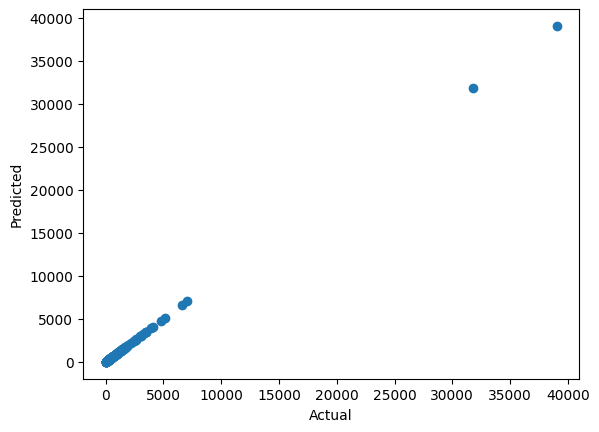

In [122]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='LTP'>

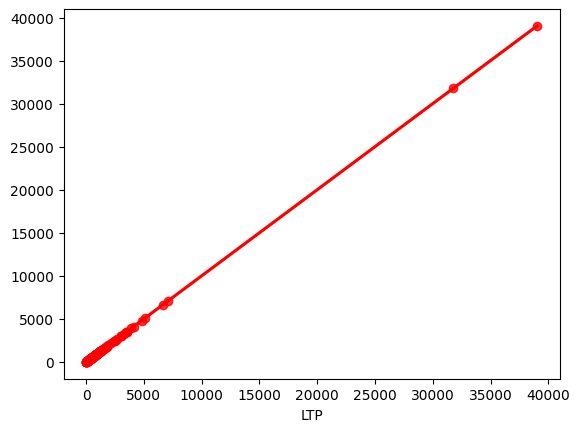

In [123]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red')

In [124]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted value,Difference
584,674.00,674.00,0.000000e+00
591,1029.00,1029.00,-4.547474e-13
486,907.45,907.45,-1.136868e-13
77,1234.00,1234.00,6.821210e-13
212,138.60,138.60,-8.526513e-14
...,...,...,...
331,17.75,17.75,-7.283063e-13
90,563.00,563.00,0.000000e+00
355,222.00,222.00,-6.536993e-13
497,278.05,278.05,-7.389644e-13
